In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('drive/MyDrive/Inter Hall Data Analytics/Train_data.xlsx',parse_dates=True)

In [ ]:
df.head()

,Warehouse id,Region,SKU id,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,...,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00
0,Wh-1,NORTH,SKU-1,27,13,30,14,22,8,8,...,12,8,8,8,8,8,14,16,8,12
1,Wh-1,NORTH,SKU-2,88,28,127,130,58,10,7,...,16,7,7,7,7,7,13,43,13,43
2,Wh-1,NORTH,SKU-3,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,Wh-1,NORTH,SKU-4,162,184,110,172,90,40,18,...,82,78,38,18,22,28,36,352,58,18
4,Wh-1,NORTH,SKU-5,171,402,627,615,300,417,141,...,468,216,75,6,30,66,141,699,183,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse id         1039 non-null   object
 1   Region               1039 non-null   object
 2   SKU id               1039 non-null   object
 3   2018-04-01 00:00:00  1039 non-null   int64 
 4   2018-05-01 00:00:00  1039 non-null   int64 
 5   2018-06-01 00:00:00  1039 non-null   int64 
 6   2018-07-01 00:00:00  1039 non-null   int64 
 7   2018-08-01 00:00:00  1039 non-null   int64 
 8   2018-09-01 00:00:00  1039 non-null   int64 
 9   2018-10-01 00:00:00  1039 non-null   int64 
 10  2018-11-01 00:00:00  1039 non-null   int64 
 11  2018-12-01 00:00:00  1039 non-null   int64 
 12  2019-01-01 00:00:00  1039 non-null   int64 
 13  2019-02-01 00:00:00  1039 non-null   int64 
 14  2019-03-01 00:00:00  1039 non-null   int64 
 15  2019-04-01 00:00:00  1039 non-null   int64 
 16  2019-0

In [ ]:
df.shape[0]

1039

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
test_predictions = list()
Y_test = list()

In [ ]:
dealers = df.shape[0]

In [ ]:
for i in range(dealers):
  print("Training {} dealer".format(i))
  data = (df.iloc[i].drop(index = {'Warehouse id','Region','SKU id'})).to_frame(name = 'Sales')
  data['Sales'] = data['Sales'].astype(str).astype(int)
  data.index.name = 'Date'
  data.index = pd.DatetimeIndex(data.index).to_period('M')
  raw_seq = data.to_numpy()
  n_steps = 6
  X, y = split_sequence(raw_seq, n_steps)
  n_features = 1
  X = X.reshape((X.shape[0], X.shape[1], n_features))
  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)
  # define model
  model = Sequential()
  model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mape')
  # fit model
  model.fit(X_train,y_train, epochs=100, verbose=0)
  test_predictions.append(model.predict(X_test).astype(int))
  Y_test.append(y_test)

Training 0 dealer
Training 1 dealer
Training 2 dealer
Training 3 dealer


KeyboardInterrupt: ignored

In [ ]:
test_predictions

In [ ]:
len(test_predictions[0])

In [ ]:
predictions = list()
for i in range(1039):
  x = list()
  for j in range(len(test_predictions[i])):
    if(test_predictions[i][j][0] < 0):
      test_predictions[i][j][0] = test_predictions[i][j-1][0]
    x.append(test_predictions[i][j][0])
  predictions.append(x)


In [ ]:
actual_values = list()
for i in range(1039):
  x = list()
  for j in range(len(Y_test[i])):
    x.append(Y_test[i][j][0])
  actual_values.append(x)


In [ ]:
predictions_df = pd.DataFrame(predictions, columns = ['Prediction_1','Prediction_2','Prediction_3','Prediction_4','Prediction_5','Prediction_6','Prediction_7'])
test_df = pd.DataFrame(actual_values,columns = ['Test_1','Test_2','Test_3','Test_4','Test_5','Test_6','Test_7'])
predictions_df.to_csv("Predictions.csv",index = False)
test_df.to_csv("YTest.csv",index = False)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
predictions_df = pd.read_csv('/content/Predictions.csv')
test_df = pd.read_csv('/content/YTest.csv')
predictions = predictions_df.to_numpy()
actual_values = test_df.to_numpy()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    error = 0 
    for i in range(len(y_true)):
      if((y_true[i] == 0) and (y_pred[i] == 0)):
        error = error
      elif(y_true[i] == 0):
        error += 1
      else:
        error += np.abs((y_true[i]-y_pred[i])/y_true[i])
    error /= len(y_true)
    return error

In [ ]:
mape = 0
for i in range(dealers):
  mape += mean_absolute_percentage_error(actual_values[i],predictions[i])
mape /= dealers
mape

1.3092248121024639

In [ ]:
test_size = len(actual_values)
def Extract(lst,k):
    return [item[k-1] for item in lst]

Text(0, 0.5, 'Sales')

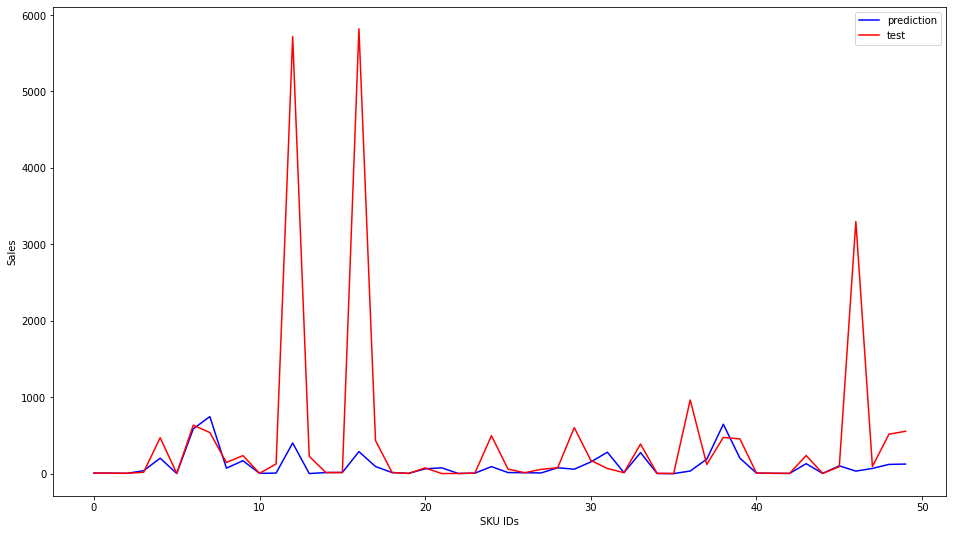

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(Extract(predictions,1)[:50],color='blue')
plt.plot(Extract(actual_values,1)[:50],color='red')
plt.legend(['prediction','test'])
plt.xlabel('SKU IDs')
plt.ylabel('Sales')